----------------------------------------------------------------------Preprocessing---------------------------------------------------------------------

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('chung_cu_chotot.csv')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860 entries, 0 to 1859
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             1860 non-null   object 
 1   location          1860 non-null   object 
 2   area              1860 non-null   object 
 3   size              1860 non-null   object 
 4   rooms             1860 non-null   object 
 5   sqm_m2            1860 non-null   int64  
 6   price_VND         1860 non-null   object 
 7   price_num         1860 non-null   float64
 8   len(price)        1860 non-null   int64  
 9   price_normalized  1860 non-null   float64
 10  price_usd         1860 non-null   object 
 11  trieu_met_vuong   1860 non-null   float64
 12  usd_per_sqm       1860 non-null   object 
 13  province          1860 non-null   object 
 14  country           1860 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 218.1+ KB


In [12]:
print(df.head())

                                               title    location  \
0              Chung cư KDC Vĩnh Lộc D'Gold 38m² 1PN  Binh Chanh   
1      Cần bán Chung cư Ehomes Nam sài gòn 40m² 1 PN  Binh Chanh   
2          Chung cư Khu căn hộ Amazing City 42m² 1PN  Binh Chanh   
3  Thật 100%, căn hộ 42m2 Saigon Mia, giá chỉ 1,8 Tỷ  Binh Chanh   
4              Chung cư Ehomes Nam Sài Gòn 46m² 1 PN  Binh Chanh   

           area   size rooms  sqm_m2  price_VND  price_num  len(price)  \
0  38 m² - 1 PN  38 m²  1 PN      38  760 triệu    760.000           4   
1  40 m² - 1 PN  40 m²  1 PN      40    1,17 tỷ      1.170           4   
2  42 m² - 1 PN  42 m²  1 PN      42  550 triệu    550.000           4   
3  42 m² - 1 PN  42 m²  1 PN      42     1,8 tỷ      1.800           3   
4  46 m² - 1 PN  46 m²  1 PN      46   1,049 tỷ      1.049           5   

   price_normalized price_usd  trieu_met_vuong usd_per_sqm  \
0             760.0   $33,333            20.00       $0.88   
1            1170.0   

In [13]:
print(df.describe())
print(df.columns)

            sqm_m2    price_num   len(price)  price_normalized  \
count  1860.000000  1860.000000  1860.000000       1860.000000   
mean     73.557527    35.095580     3.497849       3045.576836   
std      35.238791   147.629904     0.698493       2887.031987   
min      12.000000     1.000000     2.000000        100.000000   
25%      57.000000     1.950000     3.000000       1820.000000   
50%      68.000000     2.600000     3.000000       2450.000000   
75%      80.000000     3.700000     4.000000       3400.000000   
max     700.000000   980.000000     6.000000      62600.000000   

       trieu_met_vuong  
count      1860.000000  
mean         40.191022  
std          20.043842  
min           2.000000  
25%          29.965000  
50%          37.015000  
75%          46.202500  
max         349.210000  
Index(['title', 'location', 'area', 'size', 'rooms', 'sqm_m2', 'price_VND',
       'price_num', 'len(price)', 'price_normalized', 'price_usd',
       'trieu_met_vuong', 'usd_per_sq

In [14]:
#Xoá các cột không cần thiết
df = df.drop(columns=['title','area','size','price_VND','price_num','len(price)','price_usd','usd_per_sqm','province','country'], axis=1)
df

,location,rooms,sqm_m2,price_normalized,trieu_met_vuong
0,Binh Chanh,1 PN,38,760.0,20.00
1,Binh Chanh,1 PN,40,1170.0,29.25
2,Binh Chanh,1 PN,42,550.0,13.10
3,Binh Chanh,1 PN,42,1800.0,42.86
4,Binh Chanh,1 PN,46,1049.0,22.80
...,...,...,...,...,...
1855,Thu Duc,3 PN,270,11400.0,42.22
1856,Thu Duc,4 PN,60,5800.0,96.67
1857,Thu Duc,nhiều hơn 10 PN,80,5860.0,73.25
1858,Thu Duc,nhiều hơn 10 PN,210,790.0,3.76


In [15]:
# # Sử dụng str.extract() để trích xuất con số từ chuỗi
df['rooms_normalized'] = df['rooms'].str.extract('(\d+)')

# # Chuyển đổi cột 'rooms_normalized' sang kiểu dữ liệu int
df['rooms_normalized'] = pd.to_numeric(df['rooms_normalized'], errors='coerce', downcast='integer')

# #sort lại
df = df.sort_values(by='location')
df

,location,rooms,sqm_m2,price_normalized,trieu_met_vuong,rooms_normalized
0,Binh Chanh,1 PN,38,760.0,20.00,1
99,Binh Chanh,2 PN,72,2780.0,38.61,2
98,Binh Chanh,2 PN,72,2750.0,38.19,2
97,Binh Chanh,2 PN,72,2249.0,31.24,2
96,Binh Chanh,2 PN,70,2800.0,40.00,2
...,...,...,...,...,...,...
1771,Thu Duc,2 PN,53,2399.0,45.70,2
1770,Thu Duc,2 PN,52,1600.0,30.77,2
1769,Thu Duc,2 PN,52,490.0,9.42,2
1767,Thu Duc,2 PN,51,1700.0,33.33,2


In [16]:
#xử lý giá trị null ở cột rooms_normalized ,lấy giá trị trung bình của chung 
df1=df[df['rooms_normalized'].notnull()]
a=df1['rooms_normalized'].mean().round(2)
print(a)
df['rooms_normalized'].fillna(a, inplace=True)

2.1


In [17]:
# Đếm giá trị null của mỗi cột
null_count_per_column = df.isnull().sum()

print(null_count_per_column)

location            0
rooms               0
sqm_m2              0
price_normalized    0
trieu_met_vuong     0
rooms_normalized    0
dtype: int64


Tiếp tục ta sẽ xoá các dữ liệu gây nhiễu (price_normalized >= 10000)
Vì những căn hộ có giá >= 10000(10 tỷ) là những căn penthouse, biệt thự và chúng không có giá trị đại diện cho những căn chung cư
 và chúng cũng không phù hợp với đại đa số người dân Việt Nam

In [43]:
df = df[df['price_normalized'] < 20000]

In [32]:
df.describe()

,sqm_m2,price_normalized,trieu_met_vuong,rooms_normalized
count,1851.000000,1851.000000,1851.000000,1851.000000
mean,72.258779,2916.290068,39.804090,2.088061
std,27.480932,1996.426211,18.197692,0.727322
min,12.000000,100.000000,2.000000,1.000000
25%,57.000000,1810.000000,29.850000,2.000000
50%,68.000000,2450.000000,37.000000,2.000000
75%,80.000000,3400.000000,46.060000,2.000000
max,277.000000,18000.000000,241.670000,10.000000


In [33]:
#Số chung cư được rao bán tại từng vị trí
df['location'].value_counts()

location
District 9     222
Tan Phu        216
District 7     201
District 12    158
Binh Chanh     136
District 8     136
District 2     135
Thu Duc        122
Binh Thanh     100
Binh Tan        83
Nha Be          65
Go Vap          45
District 4      43
District 6      39
Tan Binh        33
Phu Nhuan       30
District 10     24
District 1      18
District 5      13
District 11     11
District 3      11
Hoc Mon          9
Cu Chi           1
Name: count, dtype: int64

In [34]:
# Xuất sang 1 file csv mới
df.to_csv('dataProcessed.csv', index= False)

----------------------------------------------------------------------Visualization---------------------------------------------------------------------

Biểu đồ scatter thể hiện mối quan hệ giữa diện tích của căn hộ (được đo bằng mét vuông) và giá bán của các căn hộ đã được chuẩn hóa, với sự phân loại bởi số phòng (rooms)

cột X : thể hiện cho diện tích của căn hộ(sqm_m2)
Cột Y: thể hiện cho giá bán của các căn hộ đã được chuẩn hóa(price_normalized)

[Text(0.5, 1.0, 'Condo prices relative to size - Last updated July 2021')]

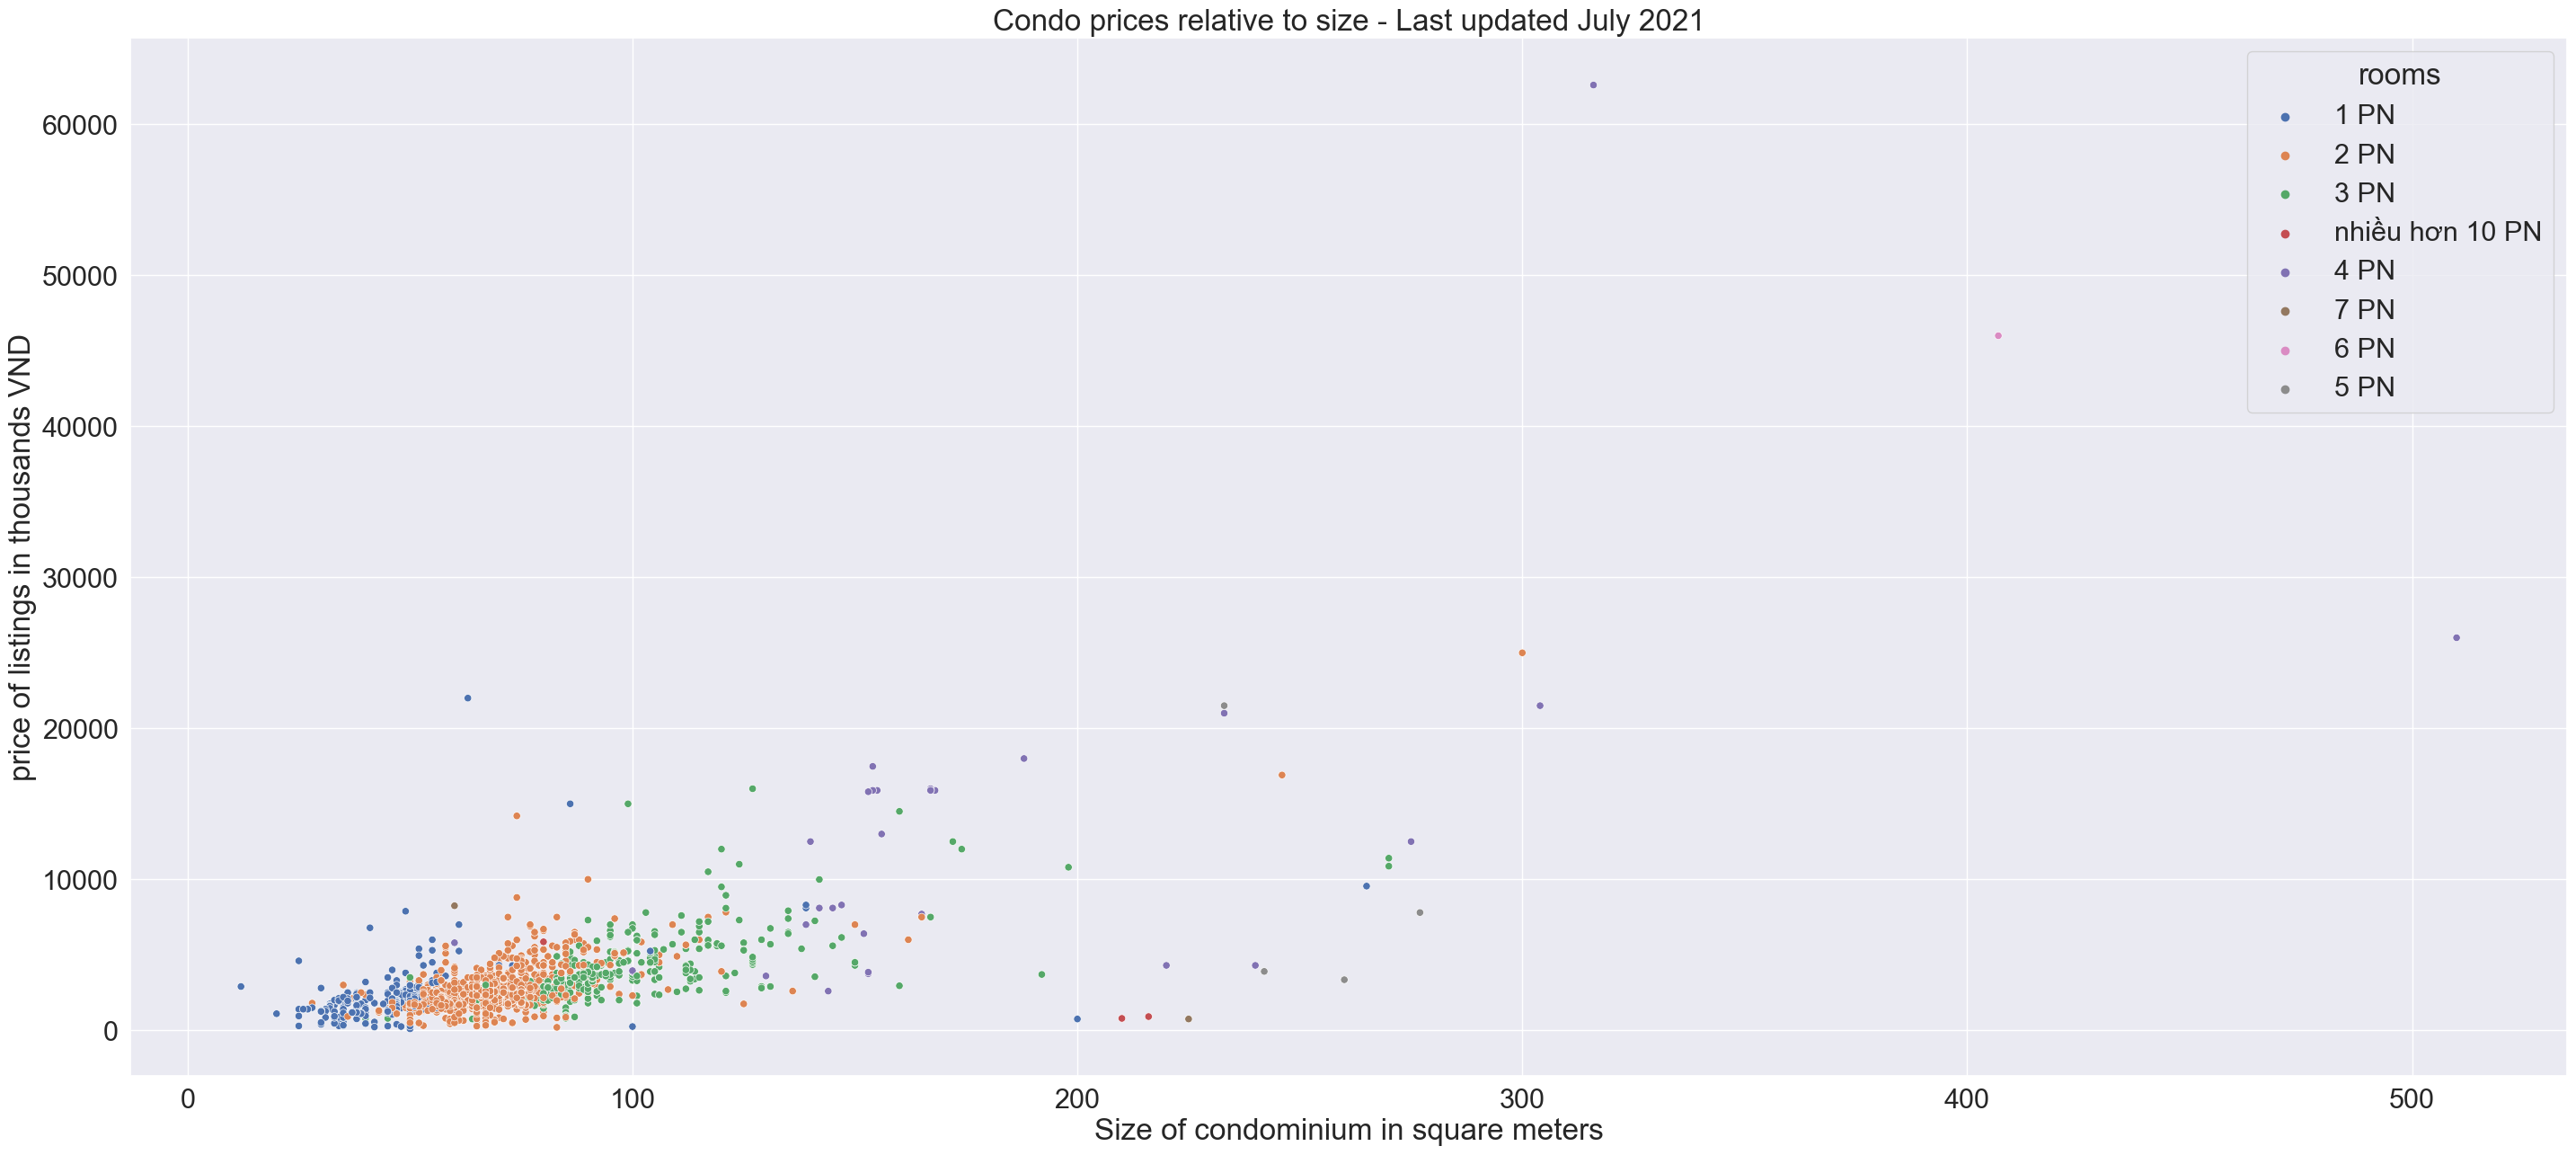

In [35]:
plt.figure(figsize=(35,15))
sns.set(font_scale=2)
g1 = sns.scatterplot(data=ct,
                     x=ct['sqm_m2'],
                     y=ct['price_normalized'],
                     hue='rooms')
g1.set(xlabel='Size of condominium in square meters')
g1.set(ylabel='price of listings in thousands VND')
g1.set(title='Condo prices relative to size - Last updated July 2021')

Biểu đồ scatter thể hiện mối quan hệ giữa diện tích của căn hộ (được đo bằng mét vuông) và giá bán của các căn hộ đã được chuẩn hóa(price_normalized), với sự phân loại bởi vị trí(location)

cột X : thể hiện cho diện tích của căn hộ(sqm_m2)
Cột Y: thể hiện cho giá bán của các căn hộ đã được chuẩn hóa(price_normalized)

[Text(0.5, 1.0, 'Condo prices relative to size - Last updated July 2021')]

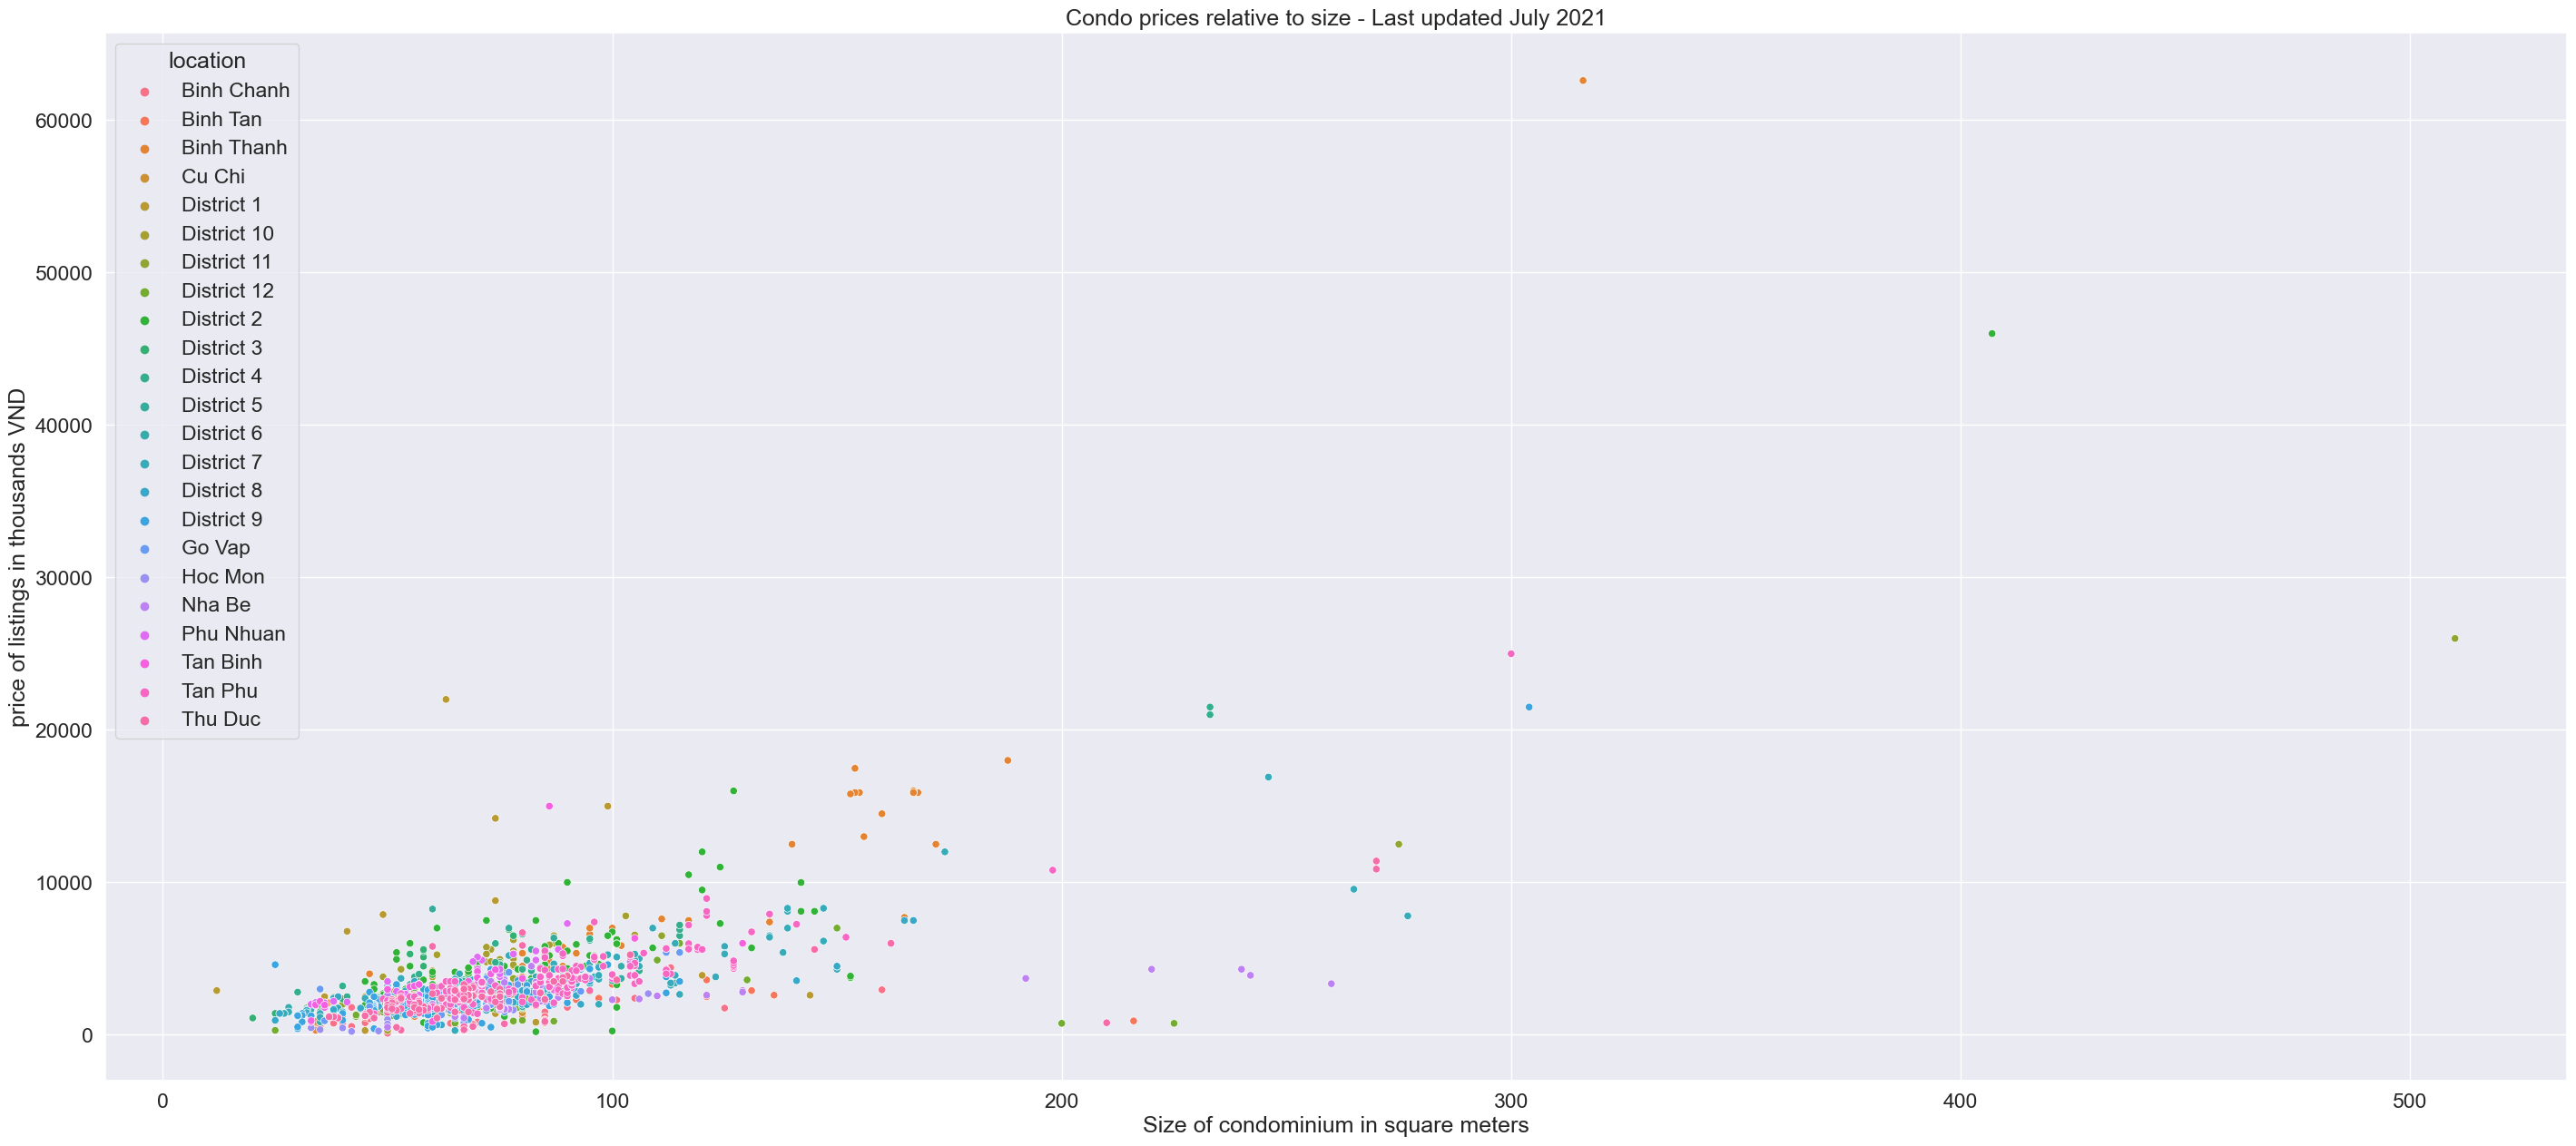

In [36]:
plt.figure(figsize=(35,15))
sns.set(font_scale=1.5)
g2 = sns.scatterplot(data=ct,
                      x='sqm_m2',
                      y='price_normalized',
                      hue='location')
g2.set(xlabel='Size of condominium in square meters')
g2.set(ylabel='price of listings in thousands VND')
g2.set(title='Condo prices relative to size - Last updated July 2021')

Biều đồ hồi quy về mối quan hệ giữa diện tích(sqm_m2) và giá tiền(price_normalized)
Biểu đồ thể hiện được diện tích phòng càng lớn thì số tiền càng tăng

[Text(0.5, 1.0, 'Condo prices relative to size - Last updated July 2021')]

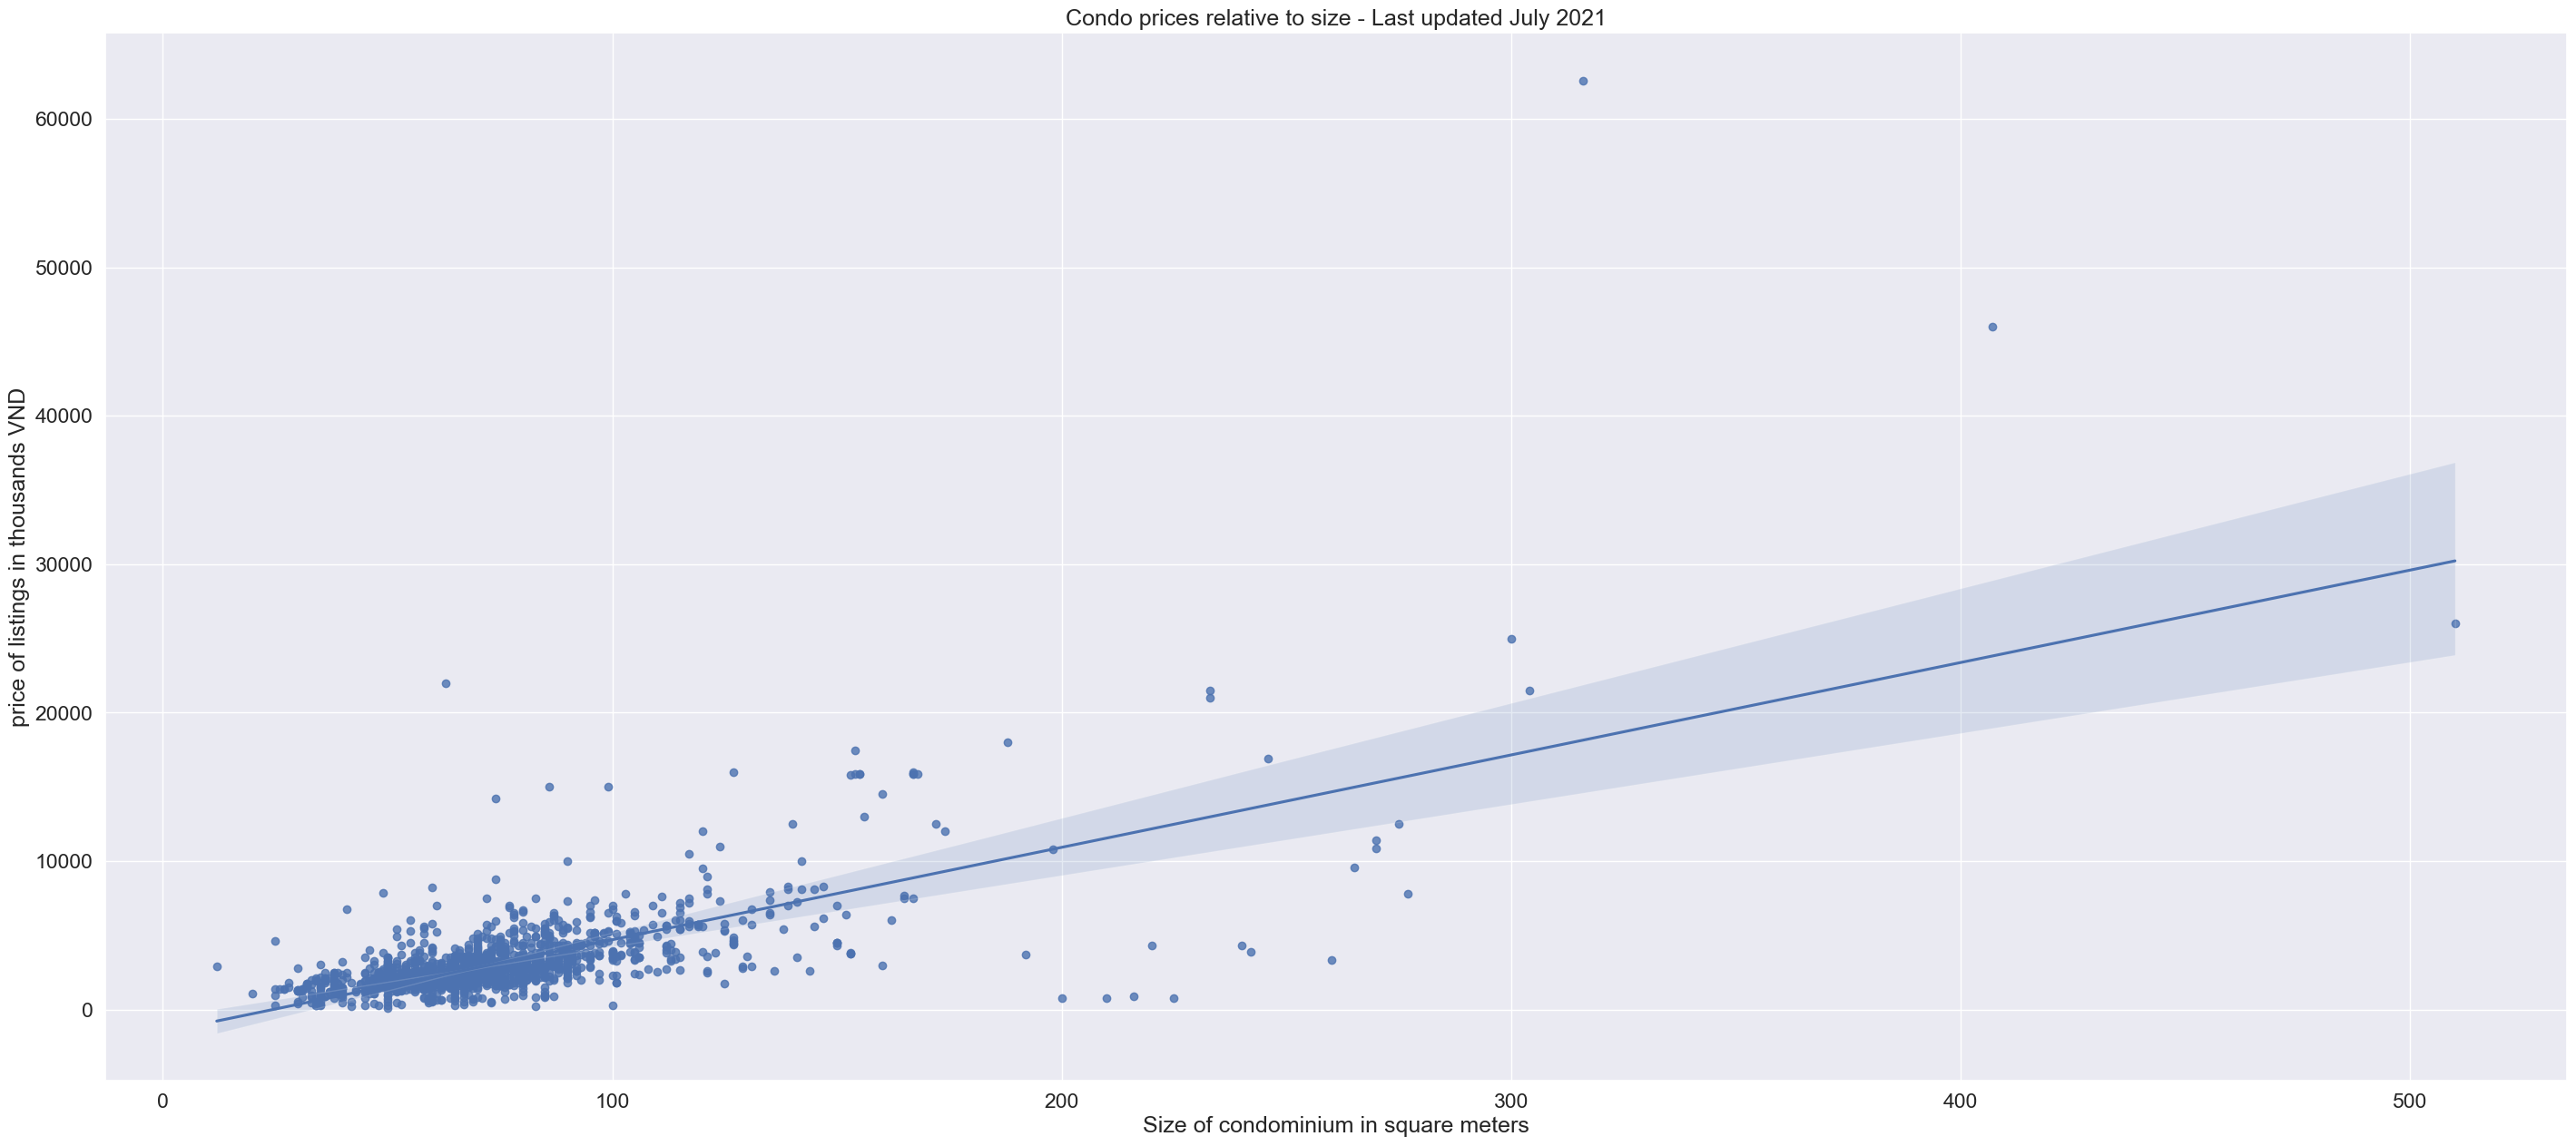

In [37]:
plt.figure(figsize=(35,15))
sns.set(font_scale=1.5)
g3 = sns.regplot(data=ct,
                  x='sqm_m2',
                  y='price_normalized')
g3.set(xlabel='Size of condominium in square meters')
g3.set(ylabel='price of listings in thousands VND')
g3.set(title='Condo prices relative to size - Last updated July 2021')

Biều đồ strip phân phối giá bán của các căn hộ dựa trên số lượng phòng

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


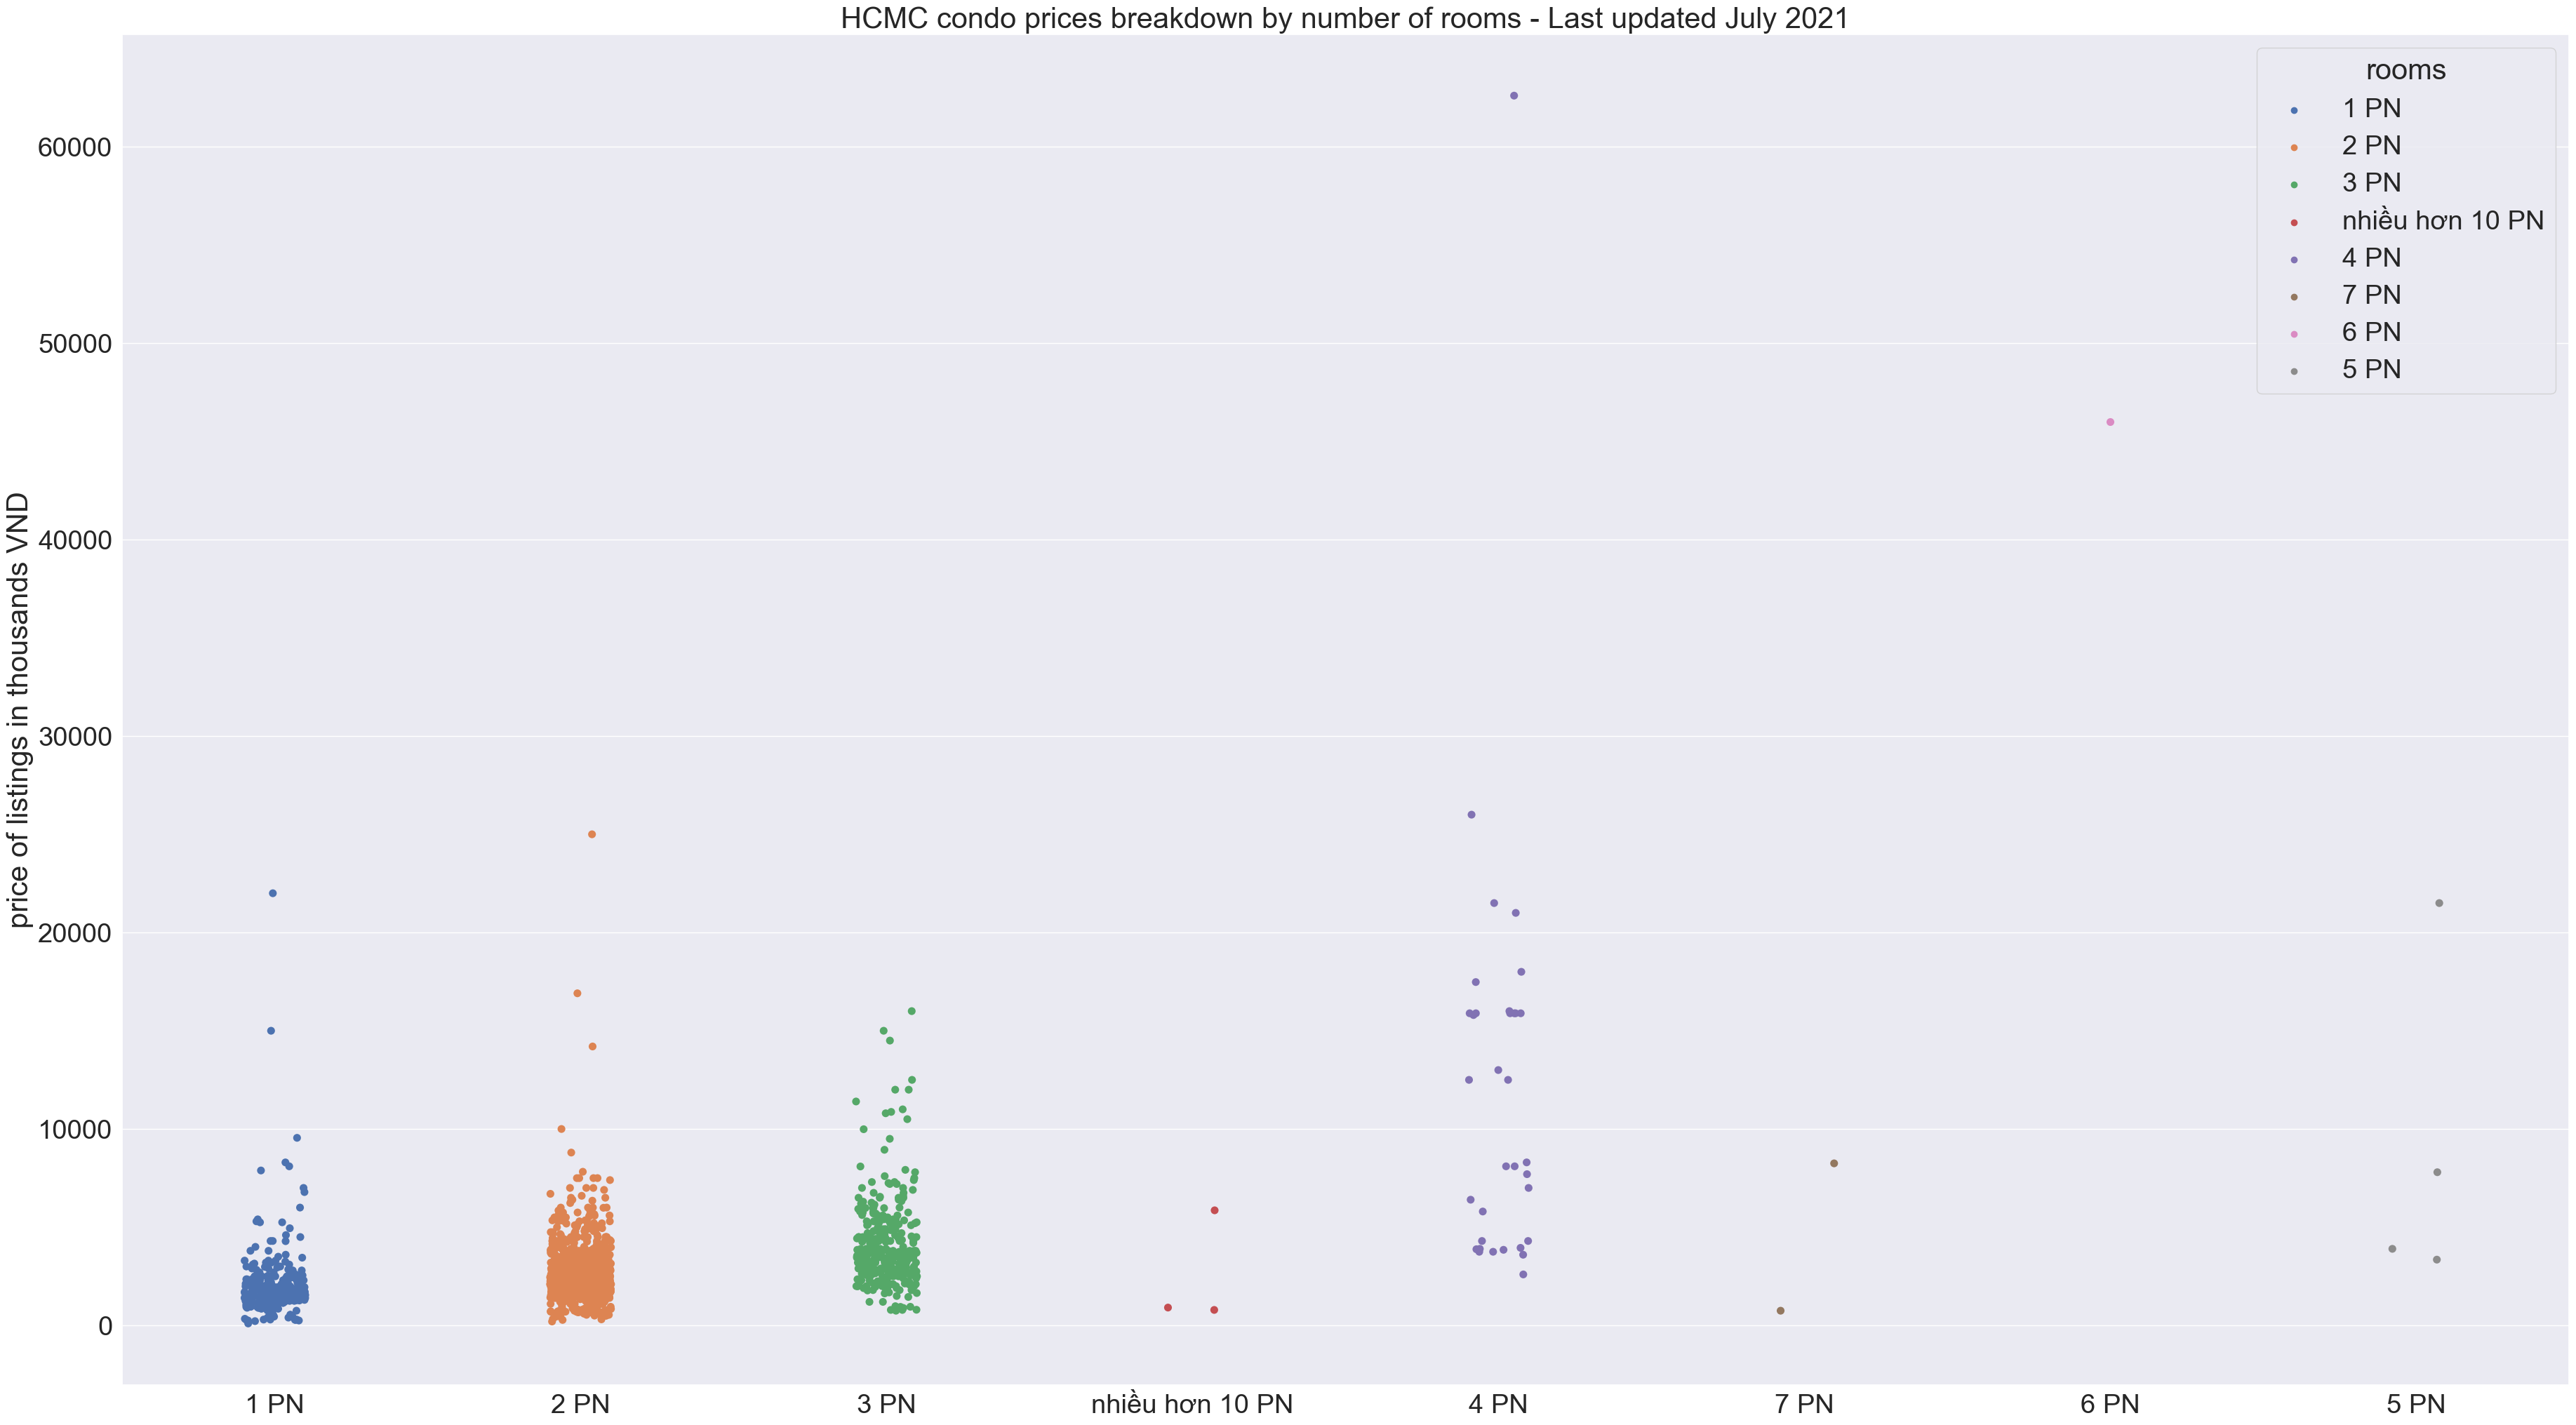

In [44]:
plt.figure(figsize=(45, 25))
sns.set(font_scale=2.5)

# Sử dụng stripplot thay vì swarmplot
g4 = sns.stripplot(data=ct,
                   x='rooms',
                   y='price_normalized',
                   hue='rooms',
                   jitter=True,  # Để tạo ra một số nhiễu nhỏ
                   size=8)  # Điều chỉnh kích thước của các điểm

g4.set(xlabel=None)
g4.set(ylabel='price of listings in thousands VND')
g4.set(title='HCMC condo prices breakdown by number of rooms - Last updated July 2021')

plt.show()